Exemplo de classificação utilizando o GBM

In [10]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Carregando o dataset
iris_class = load_iris()

# Separando os dados de treino e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(iris_class.data, iris_class.target, test_size=0.25)

# Criando o modelo
classificador_class = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Treinando o modelo
classificador_class.fit(X_train_class, y_train_class)

# Avaliando o modelo
predições_class = classificador_class.predict(X_test_class)
acurácia_class = accuracy_score(y_test_class, predições_class)

# Imprimindo a acurácia
print("Acurácia:", acurácia_class)

Acurácia: 0.9473684210526315


Exemplo de Regressão utilizando o GBM

Mean Squared Error (MSE): 2898.44
R2 Score: 0.45


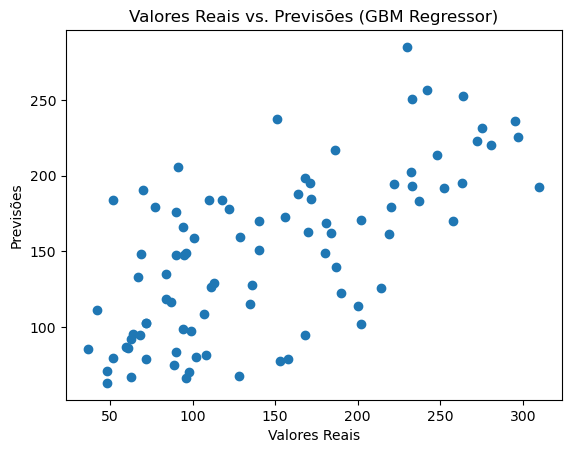

In [11]:
# Carregando o conjunto de dados Diabetes, pois o dataset "load_iris" é mais adequado para estudos de classificação
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

# Dividindo o conjunto de dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Criando o regressor GBM
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o regressor GBM
gbm_regressor.fit(X_train_reg, y_train_reg)

# Fazendo previsões no conjunto de teste
y_pred_reg = gbm_regressor.predict(X_test_reg)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Visualizando as previsões em relação aos valores reais
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões (GBM Regressor)")
plt.show()

Utilizando o GridSearch para encontrar os melhores hyperparametros, utilizando o dataset "load_iris"

In [12]:
# Carregando o conjunto de dados Iris
iris_grid = load_iris()
X_grid, y_grid = iris.data, iris.target

# Dividindo o conjunto de dados em treino e teste
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid, test_size=0.2, random_state=42)

# Criando o classificador GBM
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Definindo os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(gbm_classifier, param_grid, cv=5, scoring='accuracy')

# Realizando a pesquisa em grade no conjunto de treino
grid_search.fit(X_train_grid, y_train_grid)

# Obtendo os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Fazendo previsões no conjunto de teste com o modelo ajustado
y_pred_grid = grid_search.predict(X_test_grid)

# Avaliando a precisão do modelo com os melhores hiperparâmetros
accuracy_grid = accuracy_score(y_test_grid, y_pred_grid)
print(f'Acurácia: {accuracy_grid:.2f}')


Melhores Hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Acurácia: 1.00
